In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler  # Use StandardScaler() if needed


In [10]:
df = pd.read_csv('/content/Chocolate Sales.csv')
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [4]:
df.shape

(1094, 6)

In [5]:
df.columns


Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

In [6]:

df.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [7]:
df.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [8]:

df.describe(include='O')


,Sales Person,Country,Product,Date,Amount
count,1094,1094,1094,1094,1094
unique,25,6,22,168,827
top,Kelci Walkden,Australia,Eclairs,30-Jun-22,"$2,317"
freq,54,205,60,16,5


In [11]:
list(df.Product.unique())

['Mint Chip Choco',
 '85% Dark Bars',
 'Peanut Butter Cubes',
 'Smooth Sliky Salty',
 '99% Dark & Pure',
 'After Nines',
 '50% Dark Bites',
 'Orange Choco',
 'Eclairs',
 'Drinking Coco',
 'Organic Choco Syrup',
 'Milk Bars',
 'Spicy Special Slims',
 'Fruit & Nut Bars',
 'White Choc',
 'Manuka Honey Choco',
 'Almond Choco',
 'Raspberry Choco',
 'Choco Coated Almonds',
 "Baker's Choco Chips",
 'Caramel Stuffed Bars',
 '70% Dark Bites']

In [12]:
df[df.duplicated(keep='first')]

,Sales Person,Country,Product,Date,Amount,Boxes Shipped


In [14]:
categorical_cols = ['Sales Person', 'Country', 'Product']
numerical_cols = ['Amount', 'Boxes Shipped']


In [18]:
df["Amount"] = df["Amount"].str.replace(r"[\$,]", "", regex=True).astype(float)


AttributeError: Can only use .str accessor with string values!

In [19]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-19-73ffff6c98ea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-19-73ffff6c98ea>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [20]:
df.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [33]:

scaler = MinMaxScaler()
df[['Amount', 'Boxes Shipped']] = scaler.fit_transform(df[['Amount', 'Boxes Shipped']])


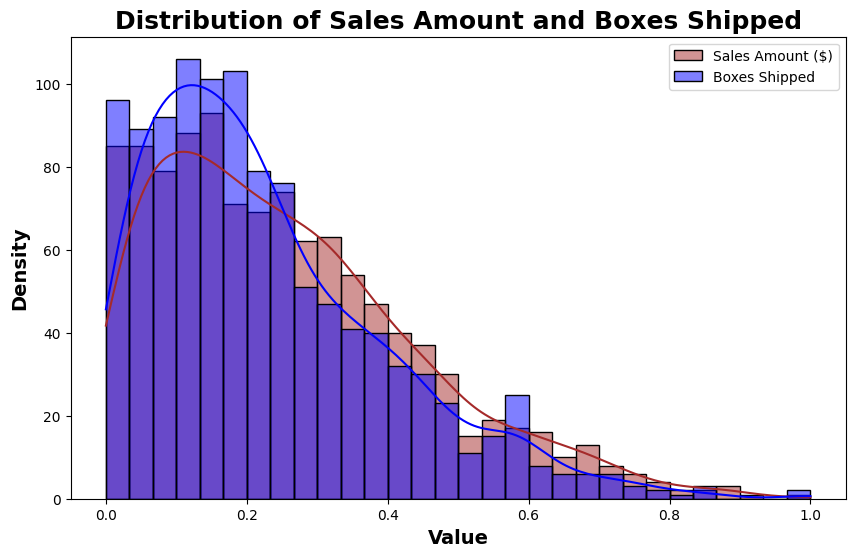

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], kde=True, color='brown', bins=30, edgecolor='black', alpha=0.5, label='Sales Amount ($)')
sns.histplot(df['Boxes Shipped'], kde=True, color='blue', bins=30, edgecolor='black', alpha=0.5, label='Boxes Shipped')
plt.title('Distribution of Sales Amount and Boxes Shipped', fontsize=18, fontweight='bold')
plt.xlabel('Value', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.legend()
plt.show()


<ipython-input-34-96664dd7104d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df, palette='pastel')


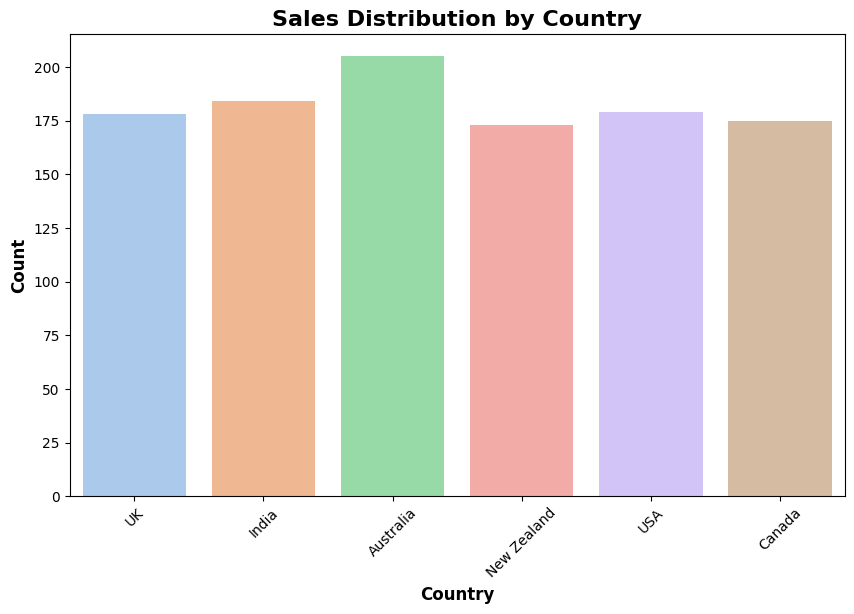

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df, palette='pastel')
plt.title('Sales Distribution by Country', size=16, fontweight='bold')
plt.xlabel('Country', size=12, fontweight='bold')
plt.ylabel('Count', size=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


<ipython-input-35-325cb06a2cc0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product', data=df, palette='coolwarm')


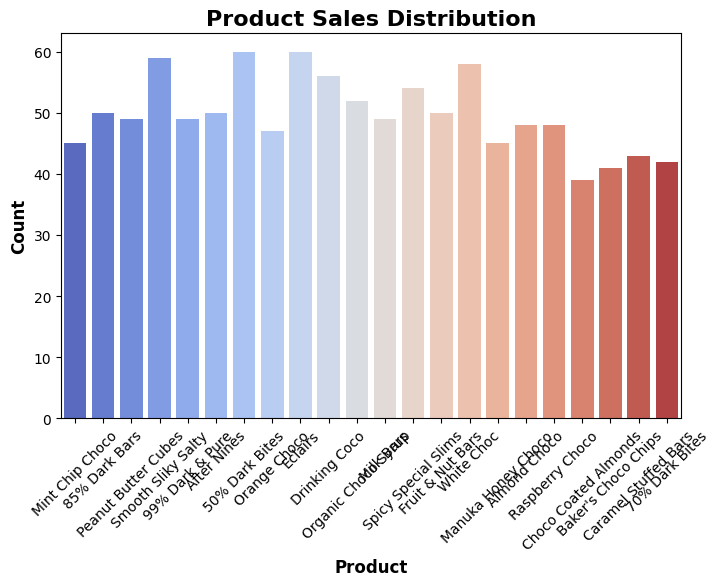

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Product', data=df, palette='coolwarm')
plt.title('Product Sales Distribution', size=16, fontweight='bold')
plt.xlabel('Product', size=12, fontweight='bold')
plt.ylabel('Count', size=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


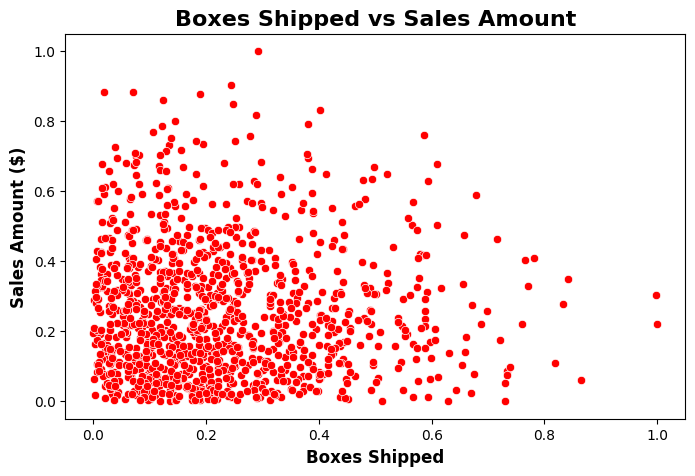

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df, color='red')
plt.title('Boxes Shipped vs Sales Amount', size=16, fontweight='bold')
plt.xlabel('Boxes Shipped', size=12, fontweight='bold')
plt.ylabel('Sales Amount ($)', size=12, fontweight='bold')
plt.show()


<ipython-input-37-1d62366f654b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product', y='Amount', data=df, palette='Accent')


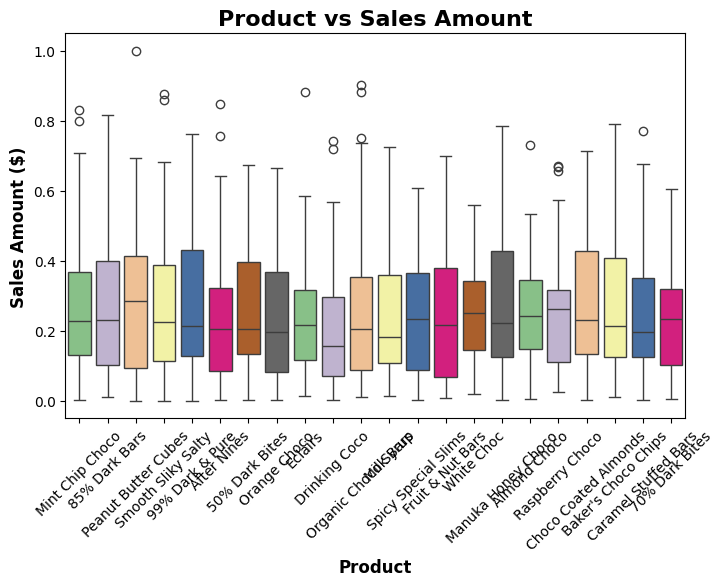

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Product', y='Amount', data=df, palette='Accent')
plt.title('Product vs Sales Amount', size=16, fontweight='bold')
plt.xlabel('Product', size=12, fontweight='bold')
plt.ylabel('Sales Amount ($)', size=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


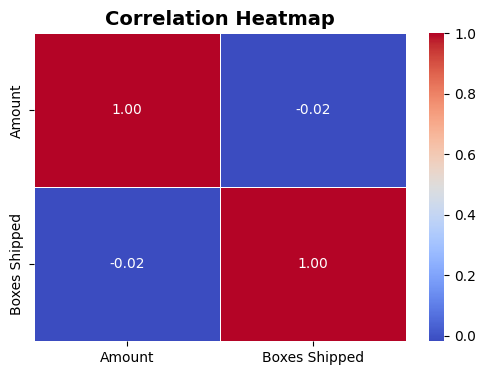

In [38]:
corr_matrix = df[['Amount', 'Boxes Shipped']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()
